# Percentual coverage of the alignment
<br>
Made by: Cynthia Soto <br>
Fecha: September 22, 2020 <br>
Datatype representation: expression levels CDS (gene_name) <br>
Data quantify with HTSeq (alignments done with STAR SA) <br>

***Case:*** <br>
Dataset: Infected and healthy samples of Arabidopsis (Col-0)<br>
Dataset composed by 20 RNASeq samples (fungi)<br>
Datatype representation: tvs format file 
<br><br>
**Process**<br>
Stats (rows) were gotten from the STAR alignment's report with a local script called: **~/my_statistics_STAR_alignment.txt** located in the **grep_utilities_folder.**
<br>
Lastest md: 03 february 2021   #New samples added.


In [1]:
# Libraries required
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
try:
    # Change the current working Directory    
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/")
    print("Directory changed:", os.getcwd() )
except OSError:
    print("Can't change the Current Working Directory")    

Directory changed: /home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis


In [3]:
# choose one of the stats file prepared.
#df=pd.read_csv("results-data/my_statistics_STAR_alignment_all.txt", sep='\s+', header=None)
df=pd.read_csv("results-data/my_statistics_STAR_alignment_healthy.txt", sep='\s+', header=None)
#df=pd.read_csv("results-data/my_statistics_STAR_alignment_infected.txt", sep='\s+', header=None)

df.columns = ["sample","stat", "value"] 
df['value'] = df['value'].str.rstrip('%').astype('float') #/ 100.0
df.head(20)

,sample,stat,value
0,SRR3383640,unique_mapped_reads,98.31
1,SRR3383641,unique_mapped_reads,98.34
2,SRR3383782,unique_mapped_reads,98.13
3,SRR3383783,unique_mapped_reads,98.34
4,SRR3383821,unique_mapped_reads,98.09
5,SRR3383822,unique_mapped_reads,97.87
6,SRR6283144,unique_mapped_reads,97.51
7,SRR6283145,unique_mapped_reads,97.99
8,SRR3383640,average_mapped_length,91.02
9,SRR3383641,average_mapped_length,90.77


### Load meta-data labels 

In [4]:
#lst_header=["sample","fungus","hpi","ID"] 
lst_header=["sample","ID"] 

file='meta-data/ID_samples.csv'   ###Ojo. arreglar ID_samples.csv metadata.csv, metadata2.cvs (index)
df_meta=pd.read_csv(file, sep='\,', engine='python',usecols=[0,1]) #usecols=[0,4]
print(df_meta.index)
print(df_meta)

## filter for ID sample name
is_sample =  df_meta['sample']=='SRR364399'
sample = df_meta[is_sample]
ID_sample = sample['ID'].values[0]
ID_sample

RangeIndex(start=0, stop=25, step=1)
         sample           ID
0    SRR3383696         Bc12
1    SRR3383697       Bc12.1
2    SRR3383780         Bc18
3    SRR3383779       Bc18.1
4   SRR10586397         Bc24
5   SRR10586399       Bc24.1
6     SRR364390         Ch22
7     SRR364389       Ch22.1
8     SRR364391       Ch22.2
9     SRR364392       Ch22.3
10    SRR364401         Ch40
11    SRR364400       Ch40.1
12    SRR364398       Ch40.2
13    SRR364399       Ch40.3
14   SRR6283148         Ss30
15   SRR6283147       Ss30.1
16   SRR6283146       Ss30.2
17   SRR3383640    healthy12
18   SRR3383641  healthy12.1
19   SRR3383782    healthy18
20   SRR3383783  healthy18.1
21   SRR3383821    healthy24
22   SRR3383822  healthy24.1
23   SRR6283144    healthy30
24   SRR6283145  Healthy30.1


'Ch40.3'

In [5]:
result = pd.merge(df, df_meta, on='sample')
result


,sample,stat,value,ID
0,SRR3383640,unique_mapped_reads,98.31,healthy12
1,SRR3383640,average_mapped_length,91.02,healthy12
2,SRR3383640,number_splices,3348936.00,healthy12
3,SRR3383640,mismatch_rate_per_base,0.07,healthy12
4,SRR3383640,deletion_average_length,1.36,healthy12
5,SRR3383640,reads_unmapped_too_short,0.07,healthy12
6,SRR3383641,unique_mapped_reads,98.34,healthy12.1
7,SRR3383641,average_mapped_length,90.77,healthy12.1
8,SRR3383641,number_splices,6808228.00,healthy12.1
9,SRR3383641,mismatch_rate_per_base,0.08,healthy12.1


In [6]:
df['stat']=="unique_mapped_reads"

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
Name: stat, dtype: bool

In [7]:
# rect1 histogram
is_unique_mapped =  df[df['stat']=="unique_mapped_reads"]

#print(is_unique_mapped)
f_mapped = is_unique_mapped['value']
#type(f_mapped)
f_mapped_no_index = f_mapped.to_string(index=False)
print(f_mapped_no_index)

#rec2 histogram
is_deletion =  df[df['stat']=="reads_unmapped_too_short"]
f_deletion = is_deletion['value']
#print(f_deletion)
f_deletion_no_index = f_deletion.to_string(index=False)
print(f_deletion_no_index)

print(len(f_mapped))
print(len(f_deletion))

 98.31
 98.34
 98.13
 98.34
 98.09
 97.87
 97.51
 97.99
 0.07
 0.09
 0.07
 0.07
 0.09
 0.08
 0.73
 0.15
8
8


In [8]:
# porcentajes de alineamientos unicos
f_mapped.sort_values()
# porcentajes de reads_unmapped_too_short
f_deletion.sort_values()

40    0.07
42    0.07
43    0.07
45    0.08
41    0.09
44    0.09
47    0.15
46    0.73
Name: value, dtype: float64

In [9]:
## Example how to get ID sample to label the plot  ***** jump to next lines
# leyends
sample_names =  df['sample'].unique()
sample_names 

print(sample_names)
sample_IDs =[]
is_sample =  df_meta['sample']=='SRR10586397'
sIDs = df_meta[is_sample].values[0,1]
sample_IDs.append(sIDs)
sample_IDs

['SRR3383640' 'SRR3383641' 'SRR3383782' 'SRR3383783' 'SRR3383821'
 'SRR3383822' 'SRR6283144' 'SRR6283145']


['Bc24']

In [10]:
## Get ID sample to label the plot 
# leyends
sample_names =  df['sample'].unique()
sample_names 

print(sample_names)
sample_IDs =[]
for name in sample_names:
    #print(name)
    is_sample =  df_meta['sample']==name
    #print(is_sample)
    sIDs = df_meta[is_sample].values[0,1]
    sample_IDs.append(sIDs)

print(sample_IDs) 


['SRR3383640' 'SRR3383641' 'SRR3383782' 'SRR3383783' 'SRR3383821'
 'SRR3383822' 'SRR6283144' 'SRR6283145']
['healthy12', 'healthy12.1', 'healthy18', 'healthy18.1', 'healthy24', 'healthy24.1', 'healthy30', 'Healthy30.1']


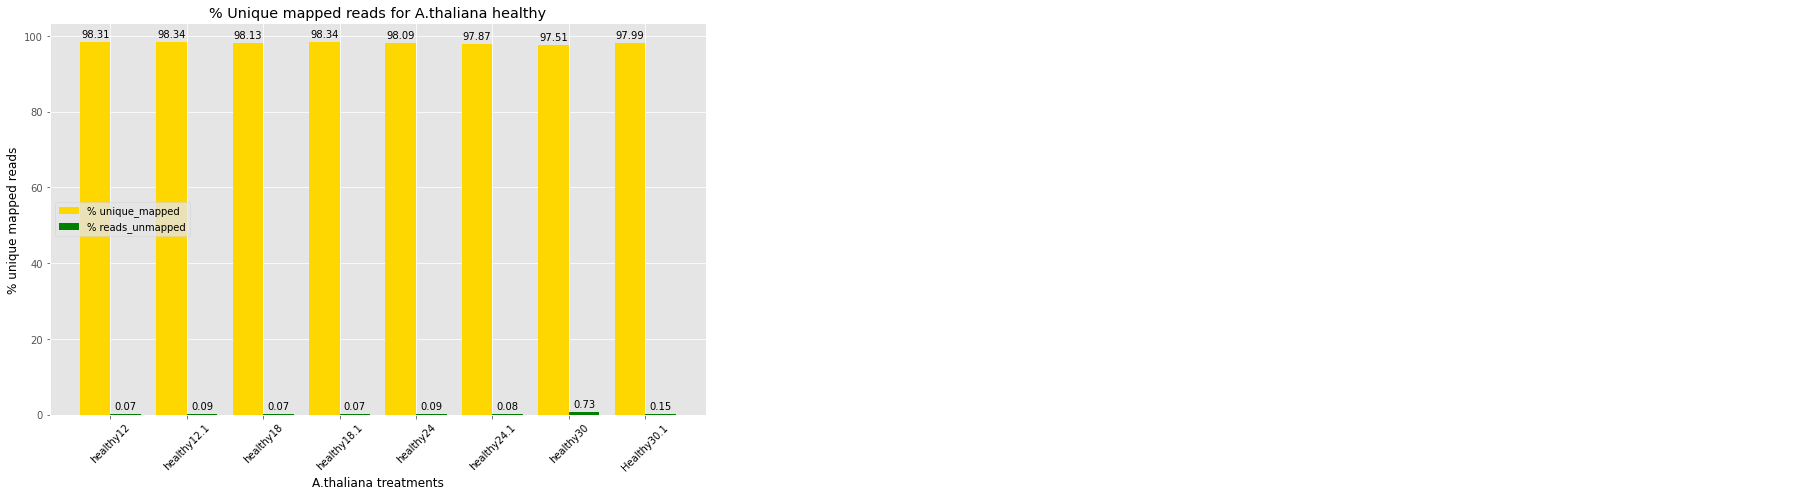

In [13]:
x = np.arange(len(sample_names))  # the label locations
width = 0.40  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
plt.style.use('ggplot')

rects1 = ax.bar(x - width/2, f_mapped, width, label='% unique_mapped', color='gold')
rects2 = ax.bar(x + width/2, f_deletion, width, label='% reads_unmapped', color='green')
# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('% unique mapped reads',color='black')
ax.set_xlabel('A.thaliana treatments',color='black')
#ax.set_title('Percentage unique mapped reads for A.thaliana infected')
ax.set_title('% Unique mapped reads for A.thaliana healthy')
ax.set_xticks(x)
ax.set_xticklabels(sample_IDs)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.legend(loc="center left")
plt.xticks(rotation=45, color='black')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()

str = 'Bs=Botrytis cinerea';
ax.annotate(str, xy=(20, 70))
str = 'Ch=Colletotrichum higginsianum';
ax.annotate(str, xy=(20, 65))
str = 'Ss=Sclerotinia sclerotiorum';
ax.annotate(str, xy=(20, 60))
 
#plt.savefig("../athal2_stats/alignment2_STAR_percentages.png")

plt.show()